## Exploratory Data Analisys
### Topic (**Inflation**) according to news portal

### Load

In [1]:
import pandas as pd
import numpy as np

Tokens

In [2]:
tokens_izq = pd.read_pickle('tokens/topic_tokens_izq_new.pkl')
tokens_der = pd.read_pickle('tokens/topic_tokens_der_new.pkl')

In [3]:
tokens_izq_inf = tokens_izq[tokens_izq.topics == 'inflation'].drop('topics', axis=1)
tokens_izq_inf.insert(loc=0, column='publication', value='left')

In [4]:
tokens_der_inf = tokens_der[tokens_der.topics == 'inflation'].drop('topics', axis=1)
tokens_der_inf.insert(loc=0, column='publication', value='right')

In [5]:
tokens = tokens_izq_inf.append(tokens_der_inf)
tokens.reset_index(inplace=True)
tokens.drop('index', axis=1, inplace=True)
tokens.fillna(0, inplace=True)

In [6]:
tokens.sample(5)

,publication,abajo,abarca,abastecimiento,abc,abierta,abiertamente,abierto,abiertos,abre,...,vuelva,vuelvan,vulgarmente,woyecheszen,xx,yaguarete,york,yuanes,zamora,zonas
74,right,0,0.0,0,0.0,0,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,right,0,0.0,0,0.0,0,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70,right,0,0.0,0,0.0,0,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,left,0,0.0,0,0.0,0,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46,right,0,0.0,0,0.0,0,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


#### Train - Test Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# data balance
tokens.publication.value_counts(normalize=True)

right    0.518519
left     0.481481
Name: publication, dtype: float64

In [9]:
X = tokens.drop('publication', axis=1)

In [10]:
y = tokens['publication']

In [11]:
train, test, y_train, y_test = train_test_split(X, y, train_size=0.75, stratify=tokens.publication)

In [12]:
train.shape, test.shape

((60, 7077), (21, 7077))

In [13]:
# data balance
display(y_train.value_counts(normalize=True), y_test.value_counts(normalize=True))

right    0.516667
left     0.483333
Name: publication, dtype: float64

right    0.52381
left     0.47619
Name: publication, dtype: float64

Vectorización con TF-IDF

In [14]:
from sklearn.feature_extraction.text import TfidfTransformer

In [15]:
train_tfidf = TfidfTransformer().fit_transform(train);

In [16]:
test_tfidf = TfidfTransformer().fit_transform(test);

### MultinomialNB
Model + CountVectorizer (manual)

In [17]:
from sklearn.naive_bayes import MultinomialNB

In [18]:
multi_nb = MultinomialNB()
multi_nb.fit(train, y_train)

MultinomialNB()

In [19]:
y_pred = multi_nb.predict(test)

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [21]:
display(accuracy_score(y_pred, y_test), confusion_matrix(y_pred, y_test))

0.9047619047619048

array([[ 9,  1],
       [ 1, 10]])

Modelo + TfIDf

In [22]:
multi_nb_2 = MultinomialNB()
multi_nb_2.fit(train_tfidf, y_train)

MultinomialNB()

In [23]:
y_pred_2 = multi_nb_2.predict(test)

In [24]:
display(accuracy_score(y_pred_2, y_test.values), confusion_matrix(y_pred_2, y_test))

0.9047619047619048

array([[ 8,  0],
       [ 2, 11]])

### Logistic Regression
Model + CountVectorizer (manual)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
logistic_regression = LogisticRegression()
logistic_regression.fit(train, y_train)

LogisticRegression()

In [27]:
y_pred_log = logistic_regression.predict(test)

In [28]:
display(accuracy_score(y_pred_log, y_test), confusion_matrix(y_pred_log, y_test))

0.9523809523809523

array([[10,  1],
       [ 0, 10]])

In [29]:
y_pred_log_proba = logistic_regression.predict_proba(test)

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

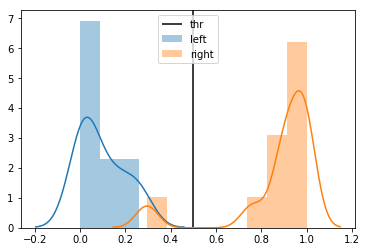

In [31]:
sns.distplot(y_pred_log_proba[y_test=='left'][:,1])
sns.distplot(y_pred_log_proba[y_test=='right'][:,1])
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['thr', 'left', 'right'])

Model + TfIDf

In [32]:
logistic_regression_2 = LogisticRegression()
logistic_regression_2.fit(train_tfidf, y_train)

LogisticRegression()

In [33]:
y_pred_log_2 = logistic_regression_2.predict(test_tfidf)

In [34]:
display(accuracy_score(y_pred_log_2, y_test), confusion_matrix(y_pred_log_2, y_test))

0.9047619047619048

array([[ 8,  0],
       [ 2, 11]])

In [35]:
y_pred_log_2_proba = logistic_regression_2.predict_proba(test)

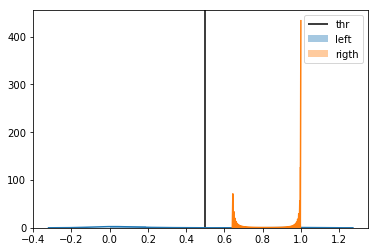

In [36]:
sns.distplot(y_pred_log_2_proba[y_test=='left'][:,1])
sns.distplot(y_pred_log_2_proba[y_test=='right'][:,1])
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['thr', 'left', 'rigth'])